In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as web
from matplotlib.ticker import FuncFormatter

In [ ]:
import sys
!{sys.executable} -m pip install PyPortfolioOpt

     |████████████████████████████████| 61kB 3.0MB/s 
     |████████████████████████████████| 1.3MB 7.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for cvxpy: filename=cvxpy-1.1.11-cp37-cp37m-linux_x86_64.whl size=2725477 sha256=af33cb9d40386cb203fce956de8ecb4dc62e7ae0146302a4b76d17422a7c2ef3
  Stored in directory: /root/.cache/pip/wheels/df/d4/eb/c74e09a39bc4ac09b3a8d2a48c1c6009f391056d8c87bf68aa
Successfully built cvxpy
  Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.cla import CLA
from pypfopt import plotting
from matplotlib.ticker import FuncFormatter

In [ ]:
from datetime import date
from pandas_datareader.data import DataReader
from pandas_datareader import data
tickers = ['SGOL','BSCR','FDHY','VGSH','VOO','BBJP','WOOD', 'SRET']
thelen = len(tickers)
price_data = []
start = date(2020,3,1)
end= date(2021,3,1)
data_source= 'yahoo'
prices = data.DataReader(tickers, data_source, start, end)

prices = prices['Adj Close']
prices.head()
  

Symbols,SGOL,BSCR,FDHY,VGSH,VOO,BBJP,WOOD,SRET
Date,,,,,,,,
2020-03-02,15.270000,20.895105,50.298717,60.561535,278.749420,21.902399,58.212421,13.066525
2020-03-03,15.750000,21.092216,49.956738,60.788128,271.060638,21.670076,57.669395,12.884919
2020-03-04,15.780000,21.150764,50.555191,60.847244,282.294342,22.095175,59.851376,13.141903
2020-03-05,16.120001,21.141010,50.213223,60.955627,272.838013,21.660191,57.699017,12.812670
2020-03-06,16.110001,21.126371,49.700256,60.995033,268.262085,21.442699,56.504356,12.611473


In [ ]:

from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage


mu = mean_historical_return(prices)
S = CovarianceShrinkage(prices).ledoit_wolf()

In [ ]:
S

Symbols,SGOL,BSCR,FDHY,VGSH,VOO,BBJP,WOOD,SRET
Symbols,,,,,,,,
SGOL,0.044879,0.005831,0.003713,0.000167,0.010321,0.008948,0.011165,0.001687
BSCR,0.005831,0.019700,0.008211,0.000028,0.013101,0.007588,0.016188,0.028619
FDHY,0.003713,0.008211,0.027820,-0.000594,0.035520,0.020520,0.037965,0.048387
VGSH,0.000167,0.000028,-0.000594,0.007773,-0.001843,-0.001171,-0.002046,-0.000968
VOO,0.010321,0.013101,0.035520,-0.001843,0.114179,0.064690,0.118281,0.125062
BBJP,0.008948,0.007588,0.020520,-0.001171,0.064690,0.066623,0.080650,0.087884
WOOD,0.011165,0.016188,0.037965,-0.002046,0.118281,0.080650,0.171479,0.175673
SRET,0.001687,0.028619,0.048387,-0.000968,0.125062,0.087884,0.175673,0.392725


In [ ]:
import sys
!{sys.executable} -m pip install PyPortfolioOpt

In [ ]:
#Max Sharpe Ratio - Tangent to the EF
from pypfopt.efficient_frontier import EfficientFrontier
ef = EfficientFrontier(mu, S, weight_bounds=(0,1)) #weight bounds in negative allows shorting of stocks
ef.efficient_return(target_return=0.06, market_neutral=False)
#sharpe_pfolio=ef.max_sharpe() #May use add objective to ensure minimum zero weighting to individual stocks
sharpe_pwt=ef.clean_weights()
print(sharpe_pwt)

OrderedDict([('SGOL', 0.07302), ('BSCR', 0.1571), ('FDHY', 0.09829), ('VGSH', 0.59018), ('VOO', 0.0), ('BBJP', 0.08141), ('WOOD', 0.0), ('SRET', 0.0)])


In [ ]:
!{sys.executable} -m pip install PyPortfolioOpt

In [ ]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices


latest_prices = get_latest_prices(prices)
allocation_minv, rem_minv = DiscreteAllocation(sharpe_pwt, latest_prices, total_portfolio_value=10000).lp_portfolio()
print(allocation_minv)
print("Leftover Fund value in$ after building minimum volatility portfolio is ${:.2f}".format(rem_minv))

{'SGOL': 43, 'BSCR': 71, 'FDHY': 18, 'VGSH': 96, 'BBJP': 28}
Leftover Fund value in$ after building minimum volatility portfolio is $13.18


In [ ]:
ef.portfolio_performance(verbose=True)

Expected annual return: 6.0%
Annual volatility: 7.1%
Sharpe Ratio: 0.56


(0.060000000000000005, 0.07106979668664601, 0.5628269935309382)

[0.07302, 0.1571, 0.09829, 0.59018, 0.0, 0.08141, 0.0, 0.0]


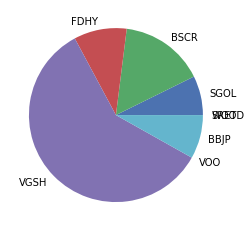

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
import matplotlib.pyplot as plt
labels = ['SGOL','BSCR','FDHY','VGSH','VOO','BBJP','WOOD', 'SRET']
sizes = list(dict(sharpe_pwt).values())

plt.pie(sizes, labels=labels)
print(sizes)

In [ ]:
tickers_new = [['SGOL'],['BSCR','FDHY','VGSH'],['VOO','BBJP','INTC']]
i=0
for tickers in tickers_new:

  ticker_list = tickers
  print(ticker_list)
  thelen = len(ticker_list)
  price_data = []
  start = date(2020,3,1)
  end= date(2021,3,1)
  data_source= 'yahoo'
  prices = data.DataReader(ticker_list, data_source, start, end)

  prices = prices['Adj Close']
  prices.head()

  mu_new = mean_historical_return(prices)
  S_new = CovarianceShrinkage(prices).ledoit_wolf()

  ef = EfficientFrontier(mu_new, S_new, weight_bounds=(0,1)) #weight bounds in negative allows shorting of stocks
  ef.efficient_return(target_return=0.06, market_neutral=False)
  #sharpe_pfolio=ef.max_sharpe() #May use add objective to ensure minimum zero weighting to individual stocks
  sharpe_pwt=ef.clean_weights()
  print(sharpe_pwt)
  print("")

  ef.portfolio_performance(verbose=True)
  #print(tickers)


['SGOL']
OrderedDict([('SGOL', 1.0)])

Expected annual return: 8.4%
Annual volatility: 20.0%
Sharpe Ratio: 0.32
['BSCR', 'FDHY', 'VGSH']
OrderedDict([('BSCR', 0.08253), ('FDHY', 0.47919), ('VGSH', 0.43829)])

Expected annual return: 6.0%
Annual volatility: 7.4%
Sharpe Ratio: 0.54
['VOO', 'BBJP', 'INTC']
OrderedDict([('VOO', 0.14316), ('BBJP', 0.85684), ('INTC', 0.0)])

Expected annual return: 31.2%
Annual volatility: 26.7%
Sharpe Ratio: 1.09


OrderedDict([('BSCR', 0.08779), ('FDHY', 0.65483), ('VGSH', 0.25739)])
Expected annual return: 7.5%
Annual volatility: 9.8%
Sharpe Ratio: 0.56
[0.06147, 0.13691, 0.07998, 0.62998, 0.0, 0.09166, 0.0]


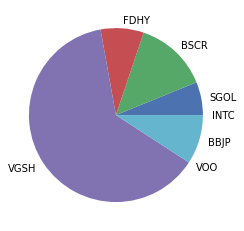

In [ ]:
tickers = ['BSCR','FDHY','VGSH']
thelen = len(tickers)
price_data = []
start = date(2020,3,1)
end= date(2021,3,1)
data_source= 'yahoo'
prices = data.DataReader(tickers, data_source, start, end)

prices = prices['Adj Close']
prices.head()

mu = mean_historical_return(prices)
S = CovarianceShrinkage(prices).ledoit_wolf()

ef = EfficientFrontier(mu, S, weight_bounds=(0,1)) #weight bounds in negative allows shorting of stocks
ef.efficient_return(target_return=0.075, market_neutral=False)
#sharpe_pfolio=ef.max_sharpe() #May use add objective to ensure minimum zero weighting to individual stocks
sharpe_pwt=ef.clean_weights()
print(sharpe_pwt)
ef.portfolio_performance(verbose=True)
plt.pie(sizes, labels=labels)
print(sizes)



In [ ]:
tickers = ['VOO','BBJP','INTC']
thelen = len(tickers)
price_data = []
start = date(2020,3,1)
end= date(2021,3,1)
data_source= 'yahoo'
prices = data.DataReader(tickers, data_source, start, end)

prices = prices['Adj Close']
prices.head()

mu = mean_historical_return(prices)
S = CovarianceShrinkage(prices).ledoit_wolf()

ef = EfficientFrontier(mu, S, weight_bounds=(0,1)) #weight bounds in negative allows shorting of stocks
ef.efficient_return(target_return=0.06, market_neutral=True)
#sharpe_pfolio=ef.max_sharpe() #May use add objective to ensure minimum zero weighting to individual stocks
sharpe_pwt=ef.clean_weights()
print(sharpe_pwt)
ef.portfolio_performance(verbose=True)


OrderedDict([('VOO', 0.14543), ('BBJP', 0.16576), ('INTC', -0.3112)])
Expected annual return: 6.0%
Annual volatility: 12.8%
Sharpe Ratio: 0.31


/usr/local/lib/python3.7/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:169: RuntimeWarning: Market neutrality requires shorting - bounds have been amended
  RuntimeWarning,


(0.06, 0.12818760065965631, 0.3120426608670346)